In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

data.rename(columns={'response':'target'}, inplace=True)

# Data exploration

In [3]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

# --- build per-variable traces but keep them hidden -------------------------
traces = []
buttons = []
for idx, col in enumerate(data.columns):
    if pd.api.types.is_numeric_dtype(data[col]):
        t = go.Histogram(
            x=data[col].dropna(), nbinsx=30, name=col, visible=(idx==0))
    else:
        vc = data[col].value_counts(dropna=False)
        t = go.Bar(x=vc.index.astype(str), y=vc.values,
                   name=col, visible=(idx==0))
    traces.append(t)
    vis = [False]*len(data.columns)
    vis[idx] = True
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": vis},
                              {"title": f"Distribution of {col}"}]))

fig = go.Figure(traces)
fig.update_layout(
    title=f"Distribution of {data.columns[0]}",
    updatemenus=[dict(active=0, buttons=buttons,
                      x=1.05, y=1.15, showactive=True)],
    width=700, height=500)

fig.show()

# Baseline classifier

In [3]:
from classifiers_pipelines import QDA_pipeline, LogReg_pipeline, RF_pipeline, XGB_pipeline, Stacked_pipeline

✅ Best QDA params: {'clf__reg_param': 0.0}


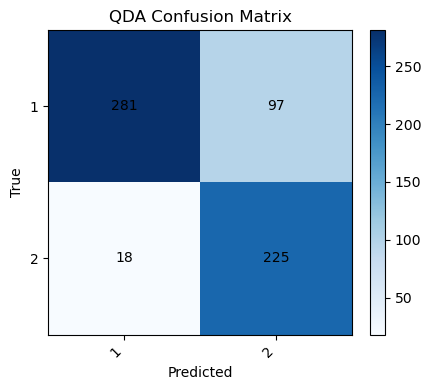

QDA metrics: {'accuracy': 0.8148148148148148, 'precision': 0.845478717879474, 'recall': 0.8148148148148148, 'f1': 0.816956641089659, 'balanced_accuracy': 0.8346560846560847, 'confusion_matrix': array([[281,  97],
       [ 18, 225]])}


In [5]:
results = QDA_pipeline(data, plot=True)

print("QDA metrics:", results["metrics_qda"])

✅ Best Logistic-Regression params: {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__l1_ratio': 0.2, 'clf__max_iter': 5000, 'clf__n_jobs': -1, 'clf__penalty': 'elasticnet', 'clf__solver': 'saga', 'clf__tol': 0.0001}


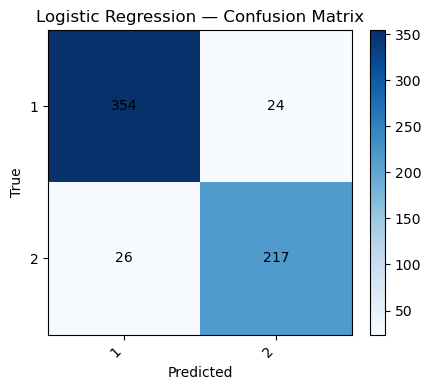

LogReg metrics: {'accuracy': 0.9194847020933977, 'precision': 0.9193843349126921, 'recall': 0.9194847020933977, 'f1': 0.9194245688817424, 'balanced_accuracy': 0.914756025867137, 'confusion_matrix': array([[354,  24],
       [ 26, 217]])}


In [6]:

results = LogReg_pipeline(data, plot=True)

print("LogReg metrics:", results["metrics_lr"])

✅ Best RF params: {'clf__class_weight': 'balanced', 'clf__max_depth': 25, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 400}


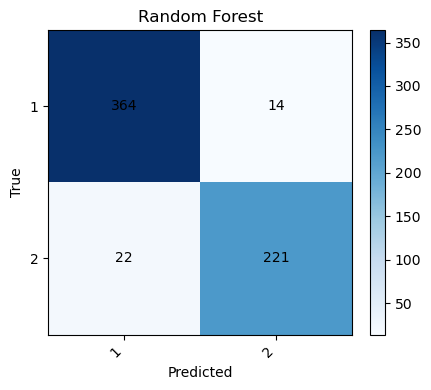

RF metrics: {'accuracy': 0.9420289855072463, 'precision': 0.9419957533084412, 'recall': 0.9420289855072463, 'f1': 0.9418473855801404, 'balanced_accuracy': 0.9362139917695473, 'confusion_matrix': array([[364,  14],
       [ 22, 221]])}


In [7]:
rf_results = RF_pipeline(data, plot=True)
print("RF metrics:", rf_results["metrics_rf"])

✅ Best XGB params: {'clf__colsample_bytree': 0.6, 'clf__learning_rate': 0.05, 'clf__max_depth': 7, 'clf__n_estimators': 400, 'clf__scale_pos_weight': 1.5522633744855967, 'clf__subsample': 1.0}


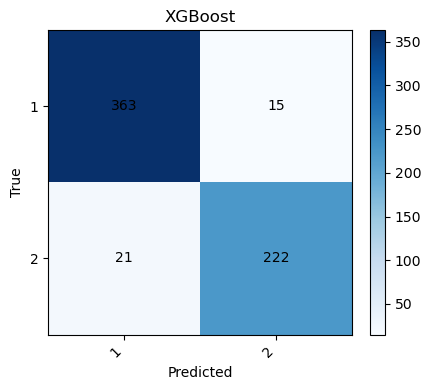

XGBoost metrics: {'accuracy': 0.9420289855072463, 'precision': 0.9419458585580628, 'recall': 0.9420289855072463, 'f1': 0.9418948990071893, 'balanced_accuracy': 0.9369488536155203, 'confusion_matrix': array([[363,  15],
       [ 21, 222]])}


In [8]:
xgb_results = XGB_pipeline(data, plot=True)

print("XGBoost metrics:", xgb_results["metrics_xgb"])

# Stacking of all models

Training QDA base model...
✅ QDA - Balanced Accuracy: 0.8314
Training LOGREG base model...
✅ LOGREG - Balanced Accuracy: 0.9148
Training RF base model...
✅ LOGREG - Balanced Accuracy: 0.9148
Training RF base model...
✅ RF - Balanced Accuracy: 0.9362
Training XGB base model...
✅ RF - Balanced Accuracy: 0.9362
Training XGB base model...
✅ XGB - Balanced Accuracy: 0.9355

Training Stacked Ensemble with logistic meta-learner...
✅ XGB - Balanced Accuracy: 0.9355

Training Stacked Ensemble with logistic meta-learner...
✅ STACKED ENSEMBLE - Balanced Accuracy: 0.9450
✅ STACKED ENSEMBLE - Balanced Accuracy: 0.9450


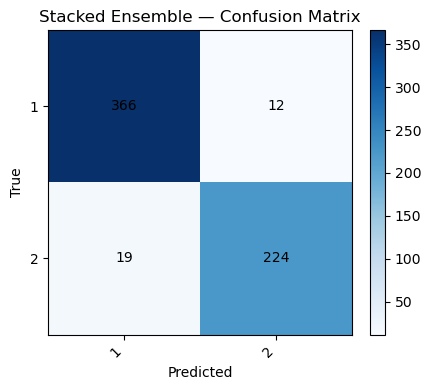

In [4]:
results = Stacked_pipeline(data, plot=True)

stacked_model = results["stacked_best"]
stacked_metrics = results["metrics_stacked"]
individual_performance = results["base_models_performance"]